In [1]:
import numpy as np
import pandas as pd
#data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#extra
import warnings 
warnings.filterwarnings('ignore')

In [2]:
lending_df = pd.read_csv(r'C:\Users\settu\Downloads\loan\loan.csv')

In [3]:
lending_df.shape

(39717, 111)

# 1 Data Cleaning
Delete incorrect rows, Unncessary Header and Footer in the data set

In [4]:
lending_df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
lending_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
## Looks like no header and footer in the data frame. Also no summary columns
#2 lets check about duplicate rows
duplicate = len(lending_df[lending_df.duplicated()])

In [7]:
print("No of duplicate rows = ", duplicate)

No of duplicate rows =  0


In [8]:
# No duplicate Rows found, 
# We found in the data set, there were many columns having Null values.
# It is not required for analysis. Hence find and remove those columns
null_columns = sum(lending_df.isnull().all())

In [9]:
null_columns

54

print('No of columns having all values as null', null_columns)

In [10]:
null_column_name = lending_df.columns[lending_df.isnull().all()]

In [11]:
null_column_name

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [12]:
null_column_name.dtype

dtype('O')

In [13]:
## Delete all the columns having null values
lending_df = lending_df.dropna(axis=1, how='all')

In [14]:
lending_df.shape

(39717, 57)

In [15]:
##Delete columns having unique values
unique_columns = [col for col in lending_df.columns if lending_df[col].nunique() ==len(lending_df)]

In [16]:
unique_columns

['id', 'member_id', 'url']

In [17]:
lending_df.drop(unique_columns, axis =1, inplace = True)

In [18]:
lending_df.shape

(39717, 54)

In [19]:
# Now Delete all the columns which are having all the values as same.. also may not be usefull for further analysis
lending_df.drop(columns=['pymnt_plan','initial_list_status', 'collections_12_mths_ex_med'], axis =1, inplace=True)


In [20]:
lending_df.shape

(39717, 51)

In [21]:
#lending_df.to_csv(r'C:\Users\murugans\Downloads\loan\loan1.csv', index=False)

In [22]:
#following variables may not provide much insights on this case study, hence removing those columns
# some column having same values across all load Ids. hence may not be useful in the analysis. Hence removing them
Other_columns_Not_useful = ['sub_grade','total_rec_late_fee','last_pymnt_amnt','last_pymnt_d','next_pymnt_d', 'last_credit_pull_d', 'policy_code','application_type','acc_now_delinq','delinq_amnt','tax_liens','earliest_cr_line']
lending_df.drop(Other_columns_Not_useful, axis =1, inplace = True)

In [23]:
lending_df.nunique().sort_values()

chargeoff_within_12_mths        1
term                            2
loan_status                     3
verification_status             3
pub_rec_bankruptcies            3
pub_rec                         5
home_ownership                  5
grade                           7
inq_last_6mths                  9
emp_length                     11
delinq_2yrs                    11
purpose                        14
open_acc                       40
addr_state                     50
issue_d                        55
total_acc                      82
mths_since_last_delinq         95
mths_since_last_record        111
int_rate                      371
zip_code                      823
loan_amnt                     885
funded_amnt                  1041
revol_util                   1089
out_prncp                    1137
out_prncp_inv                1138
collection_recovery_fee      2616
dti                          2868
recoveries                   4040
annual_inc                   5318
total_rec_prnc

In [24]:
#here we missed to delete one unique value column 'chargeoff_within_12_mths' Lets delete that
lending_df.drop(columns=['chargeoff_within_12_mths'], axis =1, inplace = True)

In [25]:
lending_df.head()
lending_df.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
mths_since_last_delinq        95
mths_since_last_record       111
int_rate                     371
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
collection_recovery_fee     2616
dti                         2868
recoveries                  4040
annual_inc                  5318
total_rec_prncp             7976
funded_amnt_inv             8205
installmen

In [26]:
#Now Lets drop all columns having more than 40% values are null.
(lending_df.isnull().sum()/len(lending_df)) *100

loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
desc                       32.585543
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
inq_last_6mths              0.000000
mths_since_last_delinq     64.662487
mths_since_last_record     92.985372
open_acc                    0.000000
pub_rec                     0.000000
revol_bal                   0.000000
r

In [27]:
null_percentage = (lending_df.isnull().sum()/len(lending_df)) *100
col_with_more_null_percentage = null_percentage[null_percentage >= 40 ]
col_with_more_null_percentage_names = col_with_more_null_percentage.index.tolist()
col_with_more_null_percentage_names

['mths_since_last_delinq', 'mths_since_last_record']

In [28]:
lending_df.drop(col_with_more_null_percentage_names, axis =1, inplace = True)

In [29]:
lending_df.shape

(39717, 36)

In [30]:
# The purpose categoricol column has "house" and "home improvement" has two different category.
# but this can be treated as single category.

In [31]:
lending_df.loc[lending_df['purpose'] == 'home_improvement','purpose'] = 'house'


In [32]:
lending_df['purpose'].value_counts()

purpose
debt_consolidation    18641
credit_card            5130
other                  3993
house                  3357
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
educational             325
renewable_energy        103
Name: count, dtype: int64

In [33]:
#lending_df.to_csv(r'C:\Users\murugans\Downloads\loan\loan1.csv', index=False)

In [34]:
#the column "purpose" has general category 'Others', for more proper analysis,
#based on the column "title" value, Others can be updated as Personal or medical or home_improvement or any other existing category.

#def update_based_on_condition(df, condition_value, update_value):
#    df['title'] = df['title'].fillna('')
#    df.loc[df['title'].str.contains(condition_value, case = False), 'purpose'] = update_value
#    return df

#conditions = {'other':'other','credit card':'credit_card','Personal':'Personal','Medical':'medical','home':'house','Vacation':'vacation', 'Car':'car','Travel':'vacation','Business':'small_business','vehicle':'car','Wedding':'wedding','purchase':'major_purchase','Debt Consolidation':'debt_consolidation','Solar':'renewable_energy','Education':'educational','Relocation':'moving', 'Moving':'moving' }
#for condition_value, update_value in conditions.items():
#   lending_df = update_based_on_condition(lending_df, condition_value, update_value)

In [35]:
lending_df['purpose'].value_counts()

purpose
debt_consolidation    18641
credit_card            5130
other                  3993
house                  3357
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
educational             325
renewable_energy        103
Name: count, dtype: int64

In [36]:
#Now we do not need a title or description of the loan as it is already categorised properly with "purpose"
lending_df.drop(columns=['desc','title','emp_title'],inplace=True)

In [37]:
#lending_df.loc[lending_df['verification_status'] == 'Source Verified'] = 'Verified'


In [38]:
lending_df['verification_status'].value_counts()

verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64

In [39]:
lending_df.shape

(39717, 33)

In [40]:
lending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   emp_length               38642 non-null  object 
 8   home_ownership           39717 non-null  object 
 9   annual_inc               39717 non-null  float64
 10  verification_status      39717 non-null  object 
 11  issue_d                  39717 non-null  object 
 12  loan_status              39717 non-null  object 
 13  purpose                  39717 non-null  object 
 14  zip_code              

# 2 Data Standardization 

In [41]:
lending_df['term'] = lending_df['term'].str.rstrip('months').str.strip()

In [42]:
lending_df['int_rate'] = lending_df['int_rate'].str.rstrip('%').str.strip()
lending_df['revol_util'] = lending_df['revol_util'].str.rstrip('%').str.strip()

In [43]:
lending_df['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [44]:
#emp_length has  2.706650% values as empty. now need to fill these values. 
# Before fixing missing values, lets convert emp_length into float values.
def fix_years(years_str):
    if isinstance(years_str, float):  # Check if the input is already a float
        return years_str
    elif 'year' in years_str:  # Check if 'year' is present in the string
        years_str = years_str.replace('year','').replace('years','')
        if '+' in years_str:  # If '+' is present, extract the number before it and add 1
            years = float(years_str.split('+')[0]) + 1
        elif '<' in years_str:  # If '<' is present, extract the number after it and subtract 0.1
            years = float(years_str.replace('<','').split()[0]) - 0.1
        else:  # Otherwise, extract the number
            years = float(years_str.split()[0])
    else:
        years = None  # Return None if the string doesn't contain 'year'
    return years

lending_df['emp_length'] = lending_df['emp_length'].apply(fix_years)

In [45]:
lending_df['emp_length'].value_counts()

emp_length
11.0    8879
0.9     4583
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: count, dtype: int64

In [46]:
lending_df['emp_length'].describe()

count    38642.000000
mean         5.309966
std          3.762025
min          0.900000
25%          2.000000
50%          4.000000
75%          9.000000
max         11.000000
Name: emp_length, dtype: float64

In [47]:
lending_df['emp_length'].median()


4.0

In [48]:
# fill the missing values with median of 'emp_length'.
lending_df['emp_length'] = lending_df['emp_length'].fillna(lending_df['emp_length'].median())

In [49]:
# Now lets check th empty values of all columns
(lending_df.isnull().sum()/len(lending_df)) *100

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
emp_length                 0.000000
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.125891
total_acc                  0.000000
out_prncp                  0.000000
out_prncp_inv              0.000000
total_pymnt                0.000000
total_pymnt_inv            0

In [50]:
# converting Columns to proper data type 
int_to_float = ['loan_amnt','funded_amnt','int_rate','revol_util']
lending_df[int_to_float] = lending_df[int_to_float].astype(float)
lending_df['term'] = lending_df['term'].astype(int)
lending_df['issue_d'] = pd.to_datetime(lending_df['issue_d'], format ='%b-%y')
# fill the missing values with median of 'revol_util'.
lending_df['revol_util'] = lending_df['revol_util'].fillna(lending_df['revol_util'].median())
lending_df['pub_rec_bankruptcies'] = lending_df['pub_rec_bankruptcies'].fillna(lending_df['pub_rec_bankruptcies'].median())
# converting earliest_cr_line to date time format. format is not consistent here. 
#So make sure it is consistent then convert to datetimeformat
#current_year = pd.Timestamp.now().year
#current_century = current_year - (current_year % 100)
#def convert_to_common_format(date_str):
#   try:
      # Attempt to parse as month-year format
#       return pd.to_datetime(date_str, format='%b-%y') + pd.offsets.DateOffset(years=current_century)
#    except ValueError:
#        try:
            # Attempt to parse as day-month format
#            return pd.to_datetime(date_str, dayfirst=True)
#        except ValueError:
            # If parsing fails, return NaT (missing value)
#           return pd.NaT
#lending_df['earliest_cr_line'] = lending_df['earliest_cr_line'].apply(convert_to_common_format)

Box plot of loan_amnt


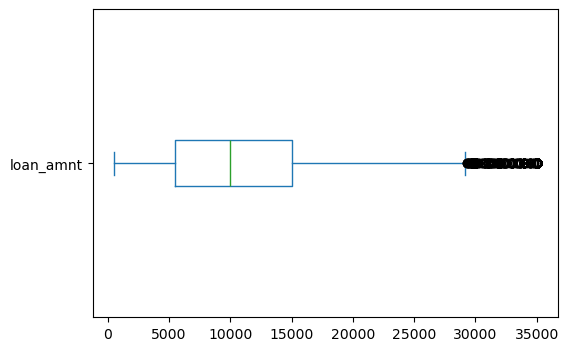

Box plot of funded_amnt


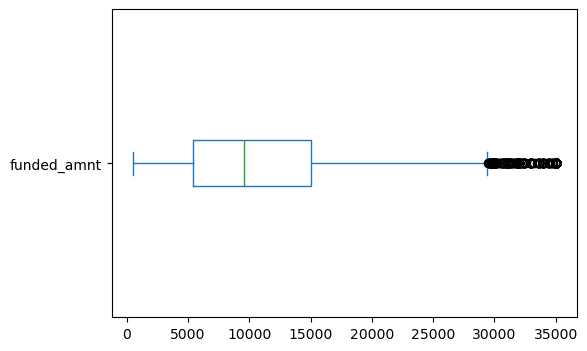

Box plot of funded_amnt_inv


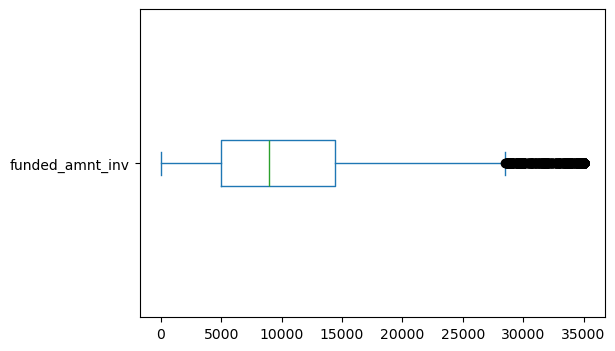

Box plot of term


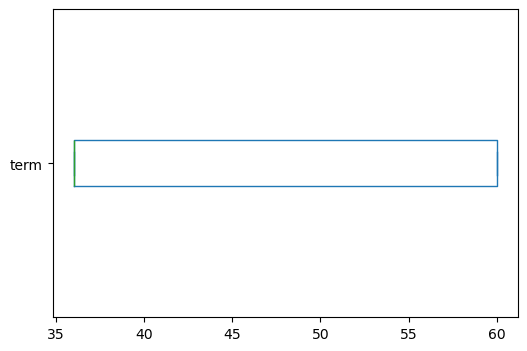

Box plot of int_rate


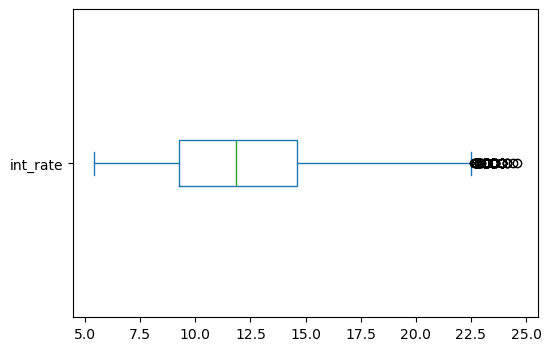

Box plot of installment


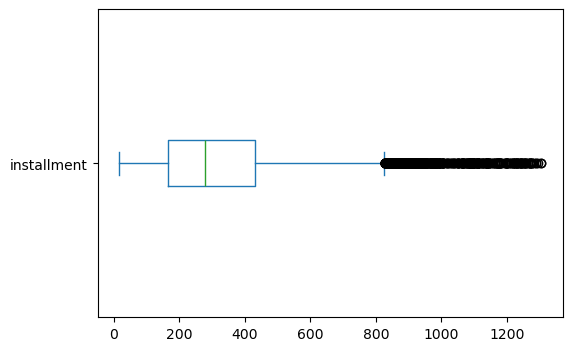

Box plot of emp_length


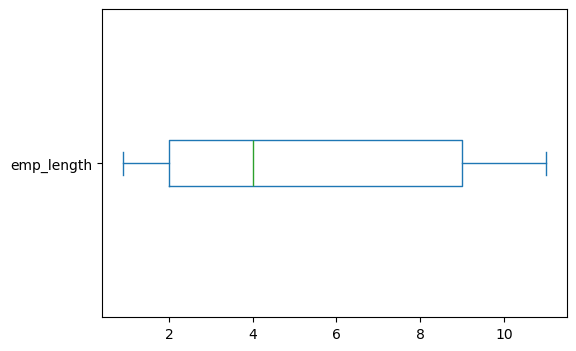

Box plot of annual_inc


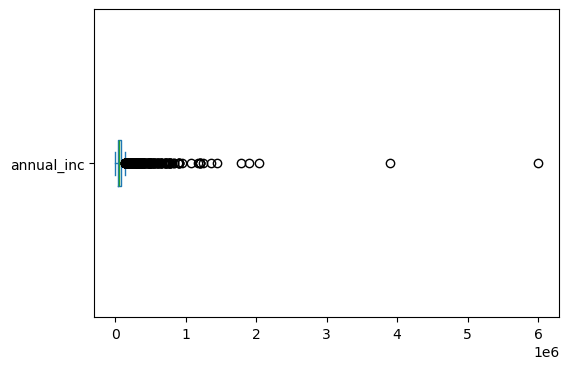

Box plot of dti


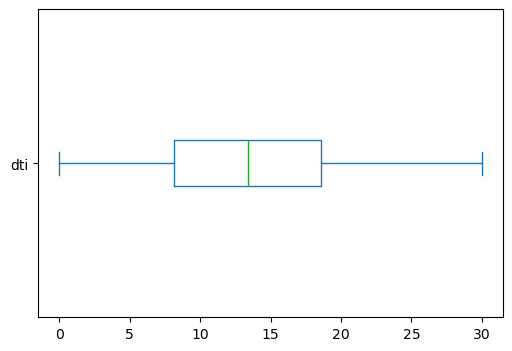

Box plot of delinq_2yrs


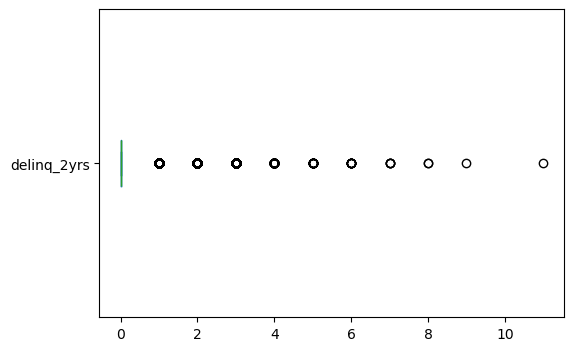

Box plot of inq_last_6mths


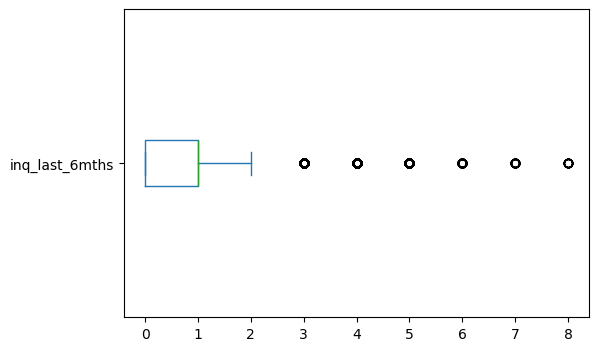

Box plot of open_acc


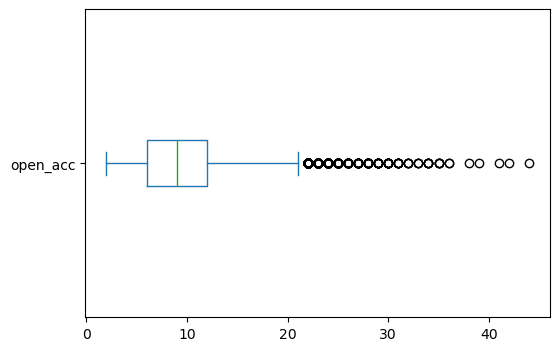

Box plot of pub_rec


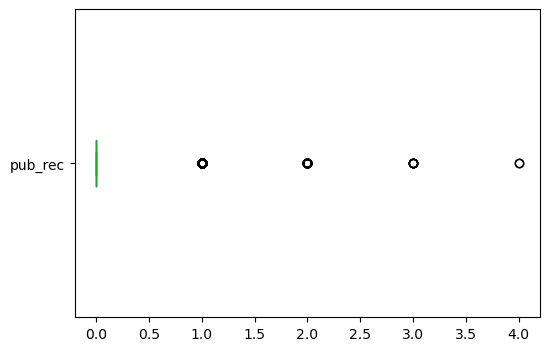

Box plot of total_acc


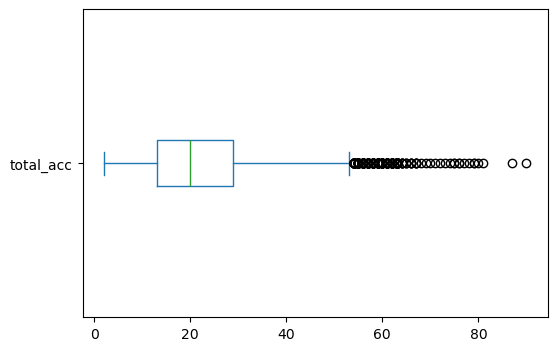

Box plot of pub_rec_bankruptcies


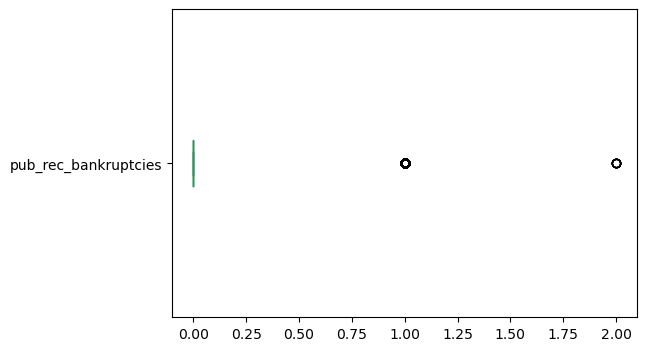

In [51]:
#3. Segmentation
numerical_column =['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','emp_length','annual_inc','dti','delinq_2yrs','inq_last_6mths','open_acc','pub_rec','total_acc','pub_rec_bankruptcies']
categorical_column = ['grade','home_ownership','verification_status','issue_d','loan_status','purpose','addr_state']

#Box plot for numerical columns to understand the outliers values
for i in numerical_column:
    print("Box plot of",i)
    lending_df[i].plot.box(figsize =(6, 4),vert=False)
    plt.show()

# 3. Univariate Analysis

In [52]:
# We see a outliers in the above box plots, we can remove the outliers in some the useful columns
cols_remove_outliers = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','inq_last_6mths','open_acc','total_acc']

#Method to remove the outliers
def remove_outliers(df, columns, threshold):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Upper_Boundary = Q3 + threshold * IQR
        Lower_Boundary = Q1 - threshold * IQR
        df = df [(df[col] >= Lower_Boundary) & (df[col] <= Upper_Boundary)]
    return df

# Now lets remove outliers from the loan data frame
lending_df = remove_outliers(lending_df, cols_remove_outliers, 1.5)



Box plot of loan_amnt


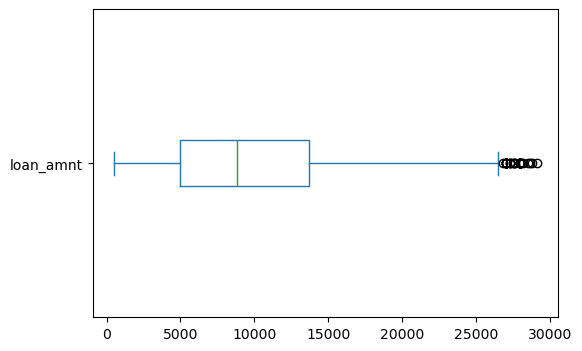

Box plot of funded_amnt


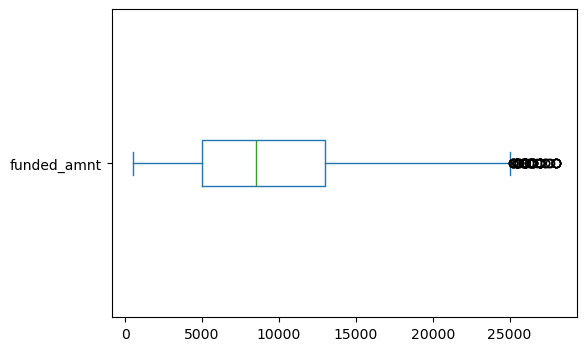

Box plot of funded_amnt_inv


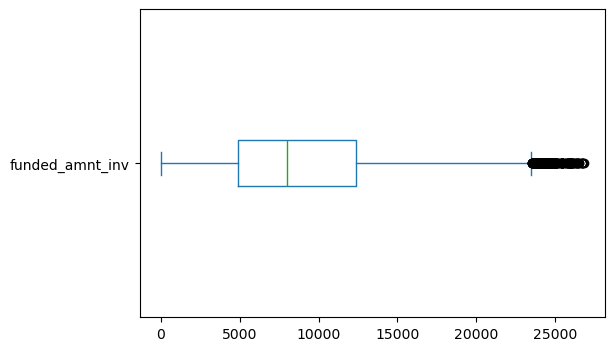

Box plot of int_rate


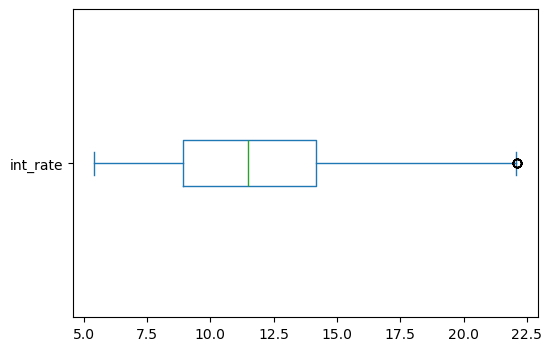

Box plot of installment


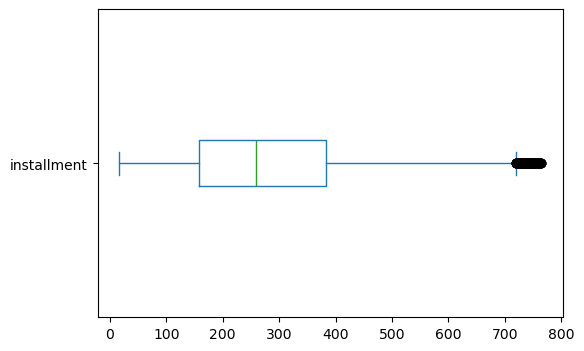

Box plot of annual_inc


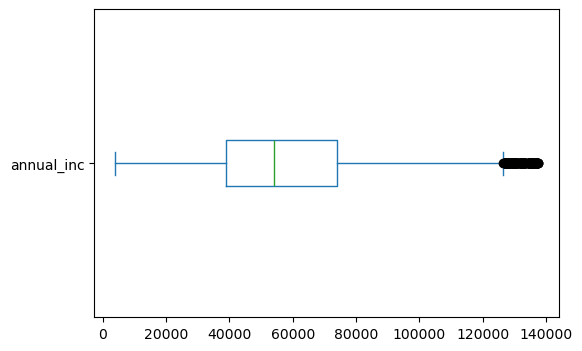

Box plot of inq_last_6mths


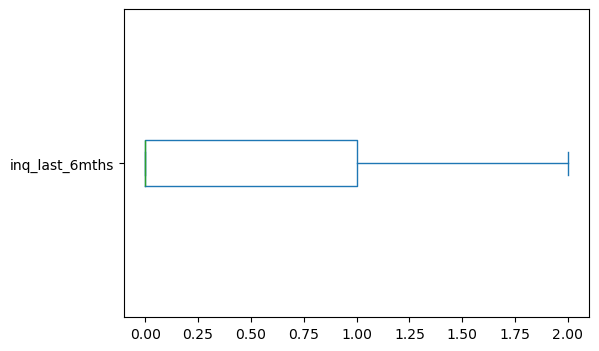

Box plot of open_acc


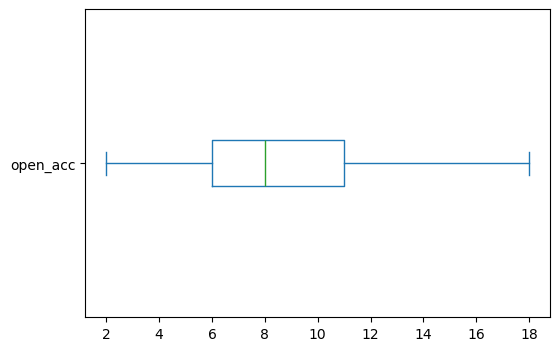

Box plot of total_acc


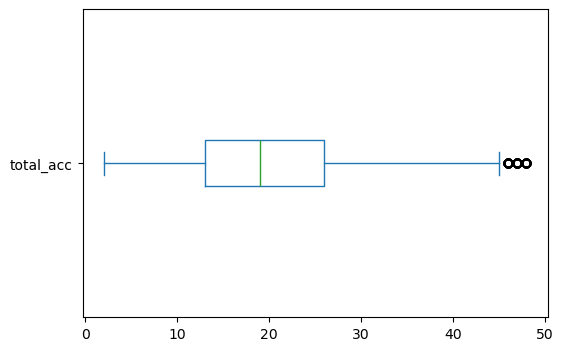

In [53]:
for col in cols_remove_outliers:
    print("Box plot of",col)
    lending_df[col].plot.box(figsize =(6, 4),vert=False)
    #sns.histplot(x=lending_df[col],bins=range(0,10))
    plt.show()
    



 Hist plot of  loan_amnt


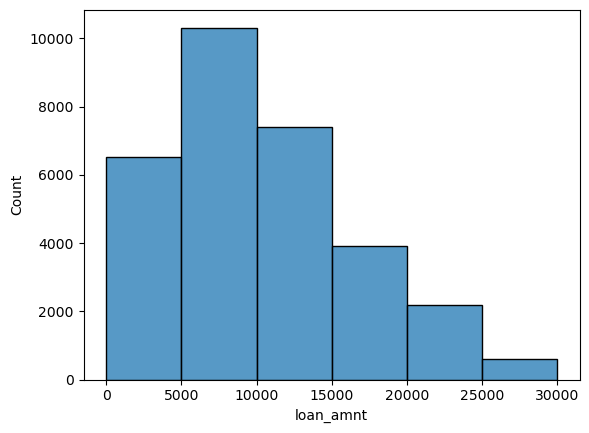

 Hist plot of  funded_amnt


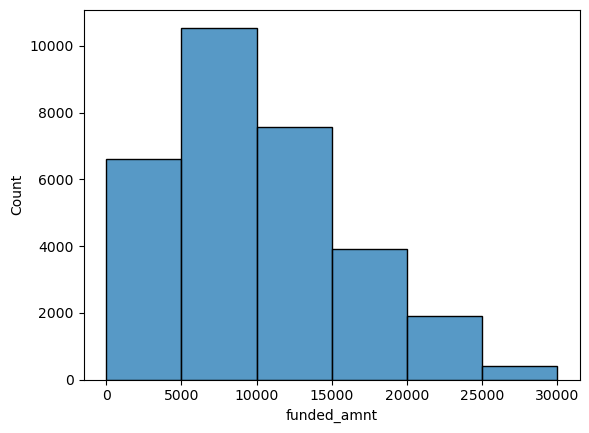

 Hist plot of  funded_amnt_inv


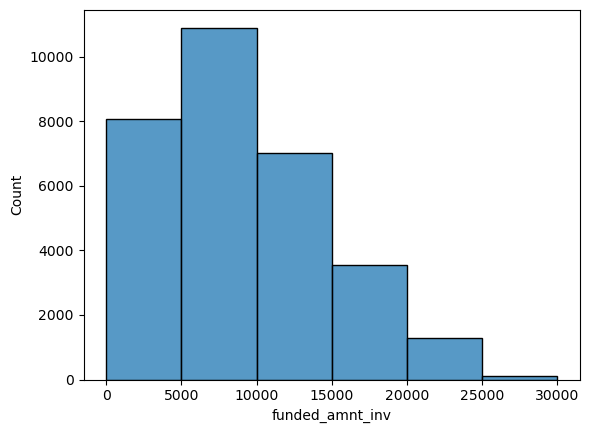

count    30947.000000
mean      9783.273015
std       5833.801508
min        500.000000
25%       5000.000000
50%       8800.000000
75%      13712.500000
max      29100.000000
Name: loan_amnt, dtype: float64

In [54]:
#Histplot to see the distribution of data sets
loanamt_columns = ['loan_amnt','funded_amnt','funded_amnt_inv']
for col in loanamt_columns:
    print(" Hist plot of ", col)
    sns.histplot(x=lending_df[col],bins=range(0,35000,5000))
    plt.show()
#Loan amount statistics
lending_df['loan_amnt'].describe()

 Hist plot of Term
value 36 23211
value 60 7736


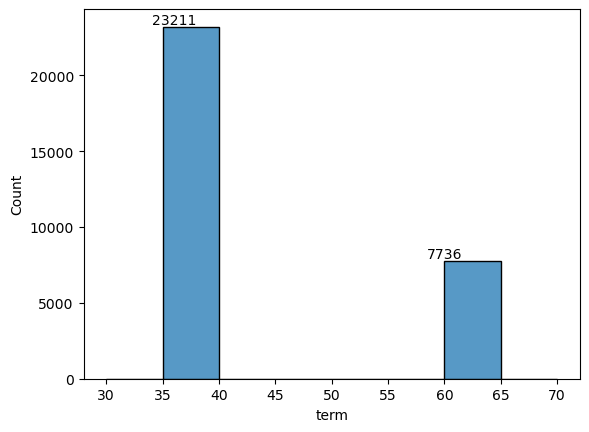

In [55]:
#plt.figure(figsize=(12,6))
print(" Hist plot of Term")
sns.histplot(x=lending_df['term'],bins=range(30,75,5))
counts= lending_df['term'].value_counts()
for i, count in counts.items():
    print('value',i, count)
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

 Hist plot of Interest Rate


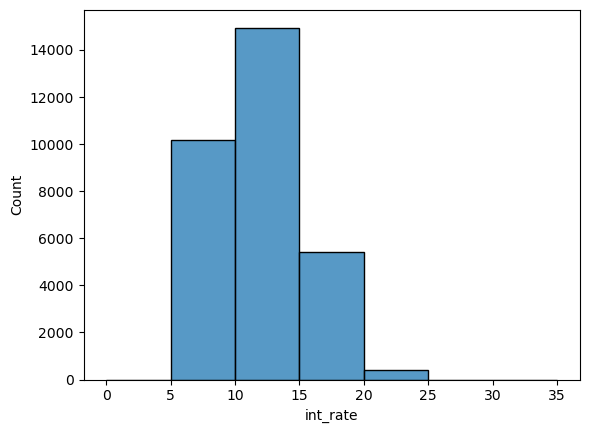

In [56]:
#plt.figure(figsize=(12,6))
print(" Hist plot of Interest Rate")
sns.histplot(x=lending_df['int_rate'],bins=range(0,40,5))
plt.show()

 Hist plot of Installment


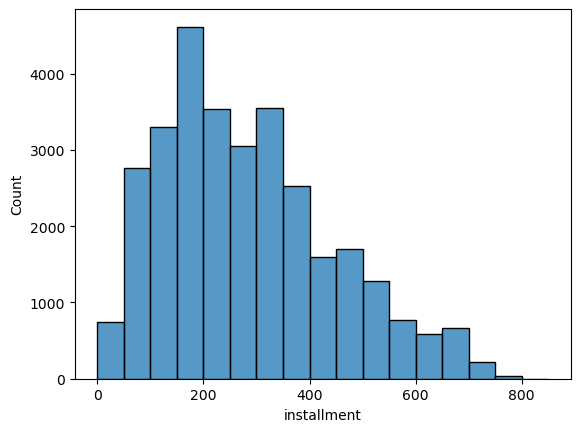

In [57]:
print(" Hist plot of Installment")
sns.histplot(x=lending_df['installment'],bins=range(0,900,50))
plt.show()

 Hist plot of Employement length


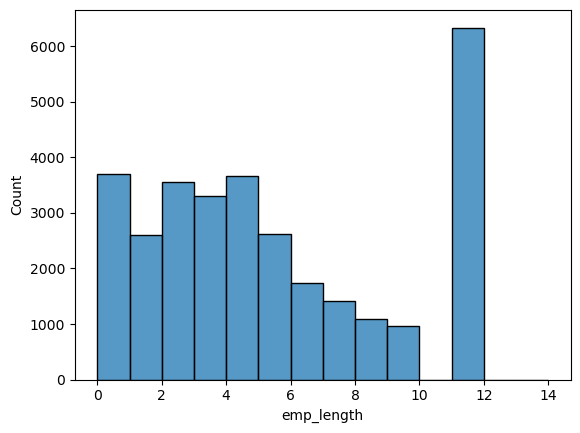

In [58]:
print(" Hist plot of Employement length")
sns.histplot(x=lending_df['emp_length'],bins=range(0,15))
plt.show()

 Hist plot of Annual Income


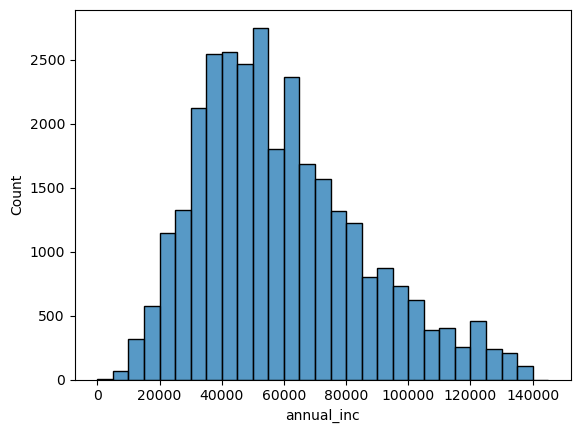

count     30947.000000
mean      58157.883198
std       26217.788067
min        4000.000000
25%       39000.000000
50%       54000.000000
75%       74000.000000
max      137500.000000
Name: annual_inc, dtype: float64

In [59]:
print(" Hist plot of Annual Income")
sns.histplot(x=lending_df['annual_inc'],bins=range(0,150000,5000))
plt.show()
lending_df['annual_inc'].describe()

 Hist plot of Ratio of Debt Payment vs Monthly Income 


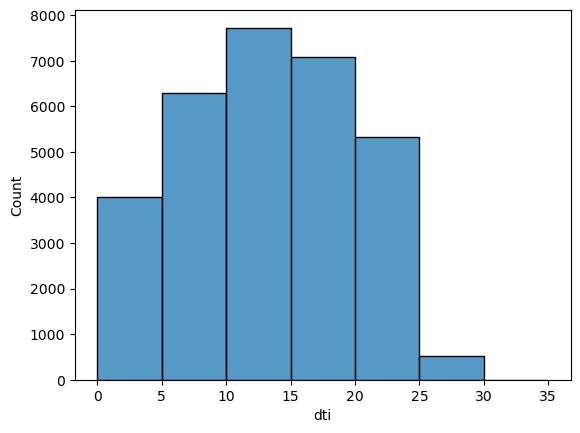

In [60]:
print(" Hist plot of Ratio of Debt Payment vs Monthly Income ")
sns.histplot(x=lending_df['dti'],bins=range(0,40,5))
plt.show()

 number of 30+ days past-due incidences in last 2 years, delinq_2yrs
value 0 27653
value 1 2554
value 2 499
value 3 172
value 4 41
value 5 15
value 6 6
value 7 4
value 8 2
value 9 1


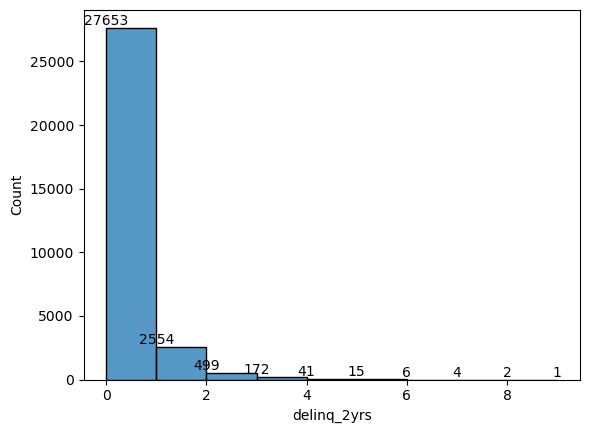

In [61]:
print(' number of 30+ days past-due incidences in last 2 years, delinq_2yrs')
sns.histplot(x=lending_df['delinq_2yrs'],bins=range(0,10))
counts= lending_df['delinq_2yrs'].value_counts()
for i, count in counts.items():
    print('value',i, count)
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

###  Distribution of loan_status


In [62]:
##Univariage Analysis on Unordered Categoricol Values/columns

value Fully Paid 25942
value Charged Off 4195
value Current 810


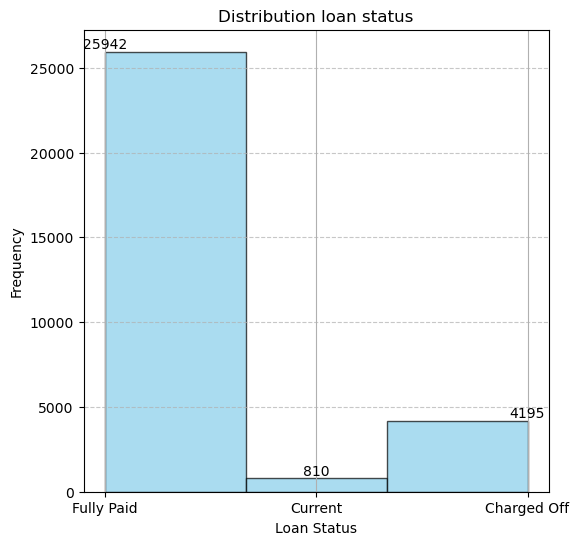

In [63]:
plt.figure(figsize=(6,6))
lending_df['loan_status'].hist(bins=3, color='skyblue', edgecolor='black', alpha=0.7)
counts= lending_df['loan_status'].value_counts()
for i, count in counts.items():
    print('value',i, count)
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title('Distribution loan status')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.xticks(range(0,3))
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()

value RENT 15974
value MORTGAGE 12472
value OWN 2421
value OTHER 77
value NONE 3


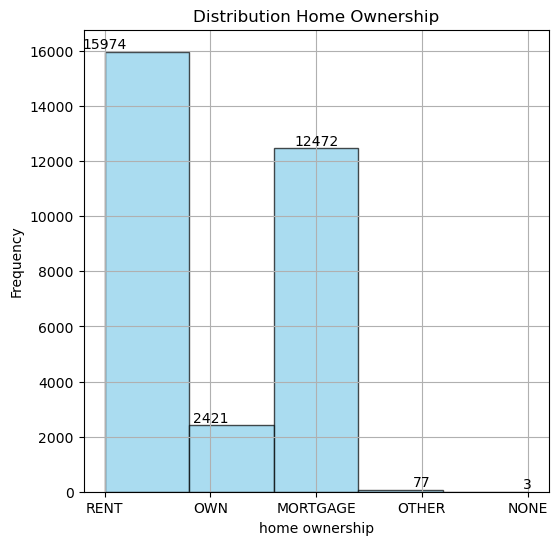

In [64]:
plt.figure(figsize=(6,6))
lending_df['home_ownership'].hist(bins=5, color='skyblue', edgecolor='black', alpha=0.7)
counts= lending_df['home_ownership'].value_counts()
for i, count in counts.items():
    print('value',i, count)
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.title('Distribution Home Ownership')
plt.xlabel('home ownership')
plt.ylabel('Frequency')

plt.show()

Distribution of Loan purpose


<Axes: xlabel='purpose'>

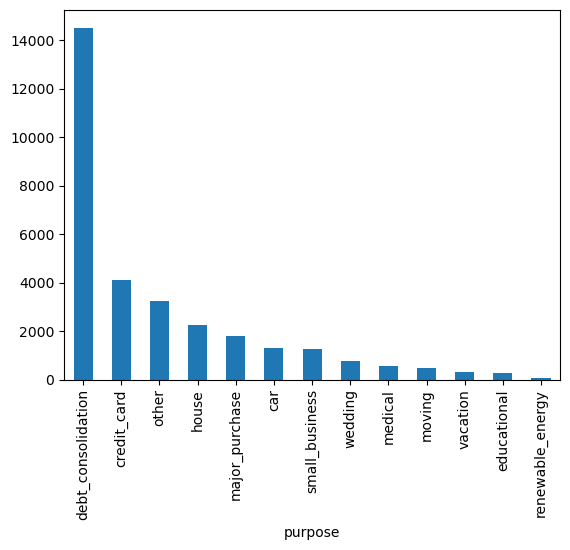

In [65]:
print("Distribution of Loan purpose")
lending_df['purpose'].value_counts().plot.bar()


Distribution of Verfication status


<Axes: xlabel='verification_status'>

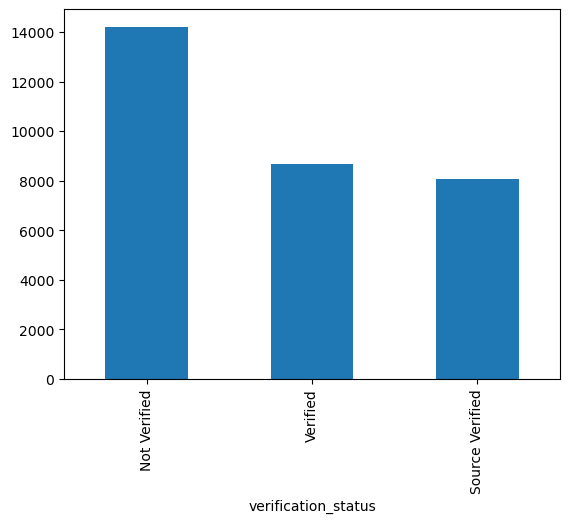

In [66]:
print("Distribution of Verfication status")
lending_df['verification_status'].value_counts().plot.bar()

<Axes: ylabel='count'>

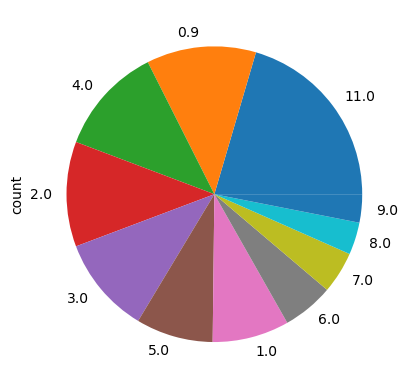

In [67]:
lending_df['emp_length'].value_counts().plot(kind="pie")

In [68]:
# 4. Bivariate Analysis
# Annual income, loan amount, interest rate are continuous variables. So for better analysis lets bucketize this values and create different data set to create better insights.
#Bucketing Loan amount:

def bucketize_loan_amnt(value):
    if value <= 5000:
        return '0-5k'
    elif (value > 5000 ) and (value <= 10000):
        return '5-10k'
    elif (value > 10000 ) and (value <= 15000):
        return '10-15k'
lending_df['loan_amount_b'] = lending_df.apply(lambda x : bucketize_loan_amnt(x['loan_amnt']), axis =1 )

#Bucketting annual income
def bucketize_annual_income(value):
    if value <= 25000:
        return '0-25k'
    elif (value > 25000 ) and (value <= 40000):
        return '25-40k'
    elif (value > 40000 ) and (value <= 50000):
        return '40-50k'
    elif (value > 50000 ) and (value <= 60000):
        return '50-60k'
    elif (value > 60000 ) and (value <= 70000):
        return '60-70k'
    elif (value > 70000 ) and (value <= 80000):
        return '70-80k'
    elif (value > 80000 ) and (value <= 90000):
        return '80-90k'
    elif (value > 90000 ) and (value <= 100000):
        return '90-100k'
    elif (value > 100000 ) :
        return 'Above 100K'
lending_df['annual_income_b'] = lending_df.apply(lambda x : bucketize_annual_income(x['annual_inc']), axis =1 )

#Bucketting interest Rate
def bucketize_interest(value):
    if value <= 8:
        return '0% to 8 %'
    elif (value > 8 ) and (value <= 12 ):
        return '8% to 12%'
    elif (value > 12 ) and (value <= 15):
        return '12% to 15%'
    elif (value > 15 ):
        return 'above 15%'
lending_df['interst_rate_b'] = lending_df.apply(lambda x : bucketize_interest(x['int_rate']), axis =1 )


In [69]:
#Lets compare the Annual income vs Charged off. Here instead of comparing annual income directly with charged off, comparing the
#buckettized annual income to get the better insights.
annual_inc_df = lending_df.groupby(['annual_income_b', 'loan_status']).loan_status.count().unstack().reset_index()
annual_inc_df['Total'] = annual_inc_df['Charged Off'] + annual_inc_df['Fully Paid']
annual_inc_df['Chargedoff_Proportion'] = (annual_inc_df['Charged Off'] / annual_inc_df['Total']) * 100
annual_inc_df.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,annual_income_b,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-25k,421,23,1896,2317,18.170047
1,25-40k,1087,136,5318,6405,16.971116
3,50-60k,686,145,4042,4728,14.509306
2,40-50k,724,157,4297,5021,14.419438
4,60-70k,410,89,2889,3299,12.428008
5,70-80k,325,77,2382,2707,12.005911
6,80-90k,200,81,1698,1898,10.537408
7,90-100k,141,45,1338,1479,9.533469
8,Above 100K,201,57,2082,2283,8.804205


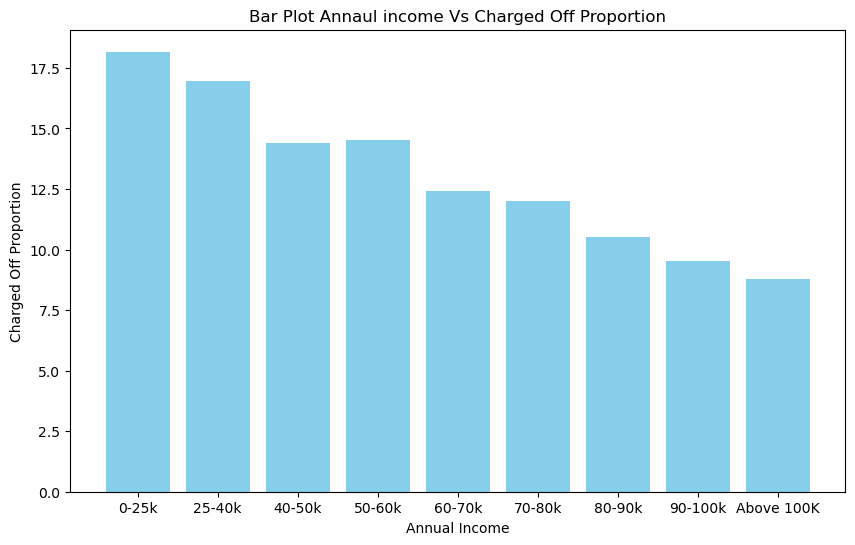

In [70]:
# the above table gives the inference that lower the salary category having the hightest possibility of Defaulting the loan.
# Lets visualize it using bar plot. Here we are not considering the column Current.
plt.figure(figsize=(10, 6))
plt.bar(annual_inc_df['annual_income_b'], annual_inc_df['Chargedoff_Proportion'], color='skyblue')

# Adding titles and labels
plt.title('Bar Plot Annaul income Vs Charged Off Proportion')
plt.xlabel('Annual Income')
plt.ylabel('Charged Off Proportion')
plt.show()

In [71]:
#Lets compare the Interest rate vs Charged off. Here instead of comparing interest rate directly with charged off, comparing the
#buckettized interest rate to get the better insights. Here we are not considering the column Current.
interest_df = lending_df.groupby(['interst_rate_b', 'loan_status']).loan_status.count().unstack().reset_index()
interest_df['Total'] = interest_df['Charged Off'] + interest_df['Fully Paid']
interest_df['Chargedoff_Proportion'] = (interest_df['Charged Off'] / interest_df['Total']) * 100
interest_df.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,interst_rate_b,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
3,above 15%,1416,361,4052,5468,25.896123
1,12% to 15%,1247,204,6465,7712,16.169606
2,8% to 12%,1165,230,8840,10005,11.644178
0,0% to 8 %,367,15,6585,6952,5.279056


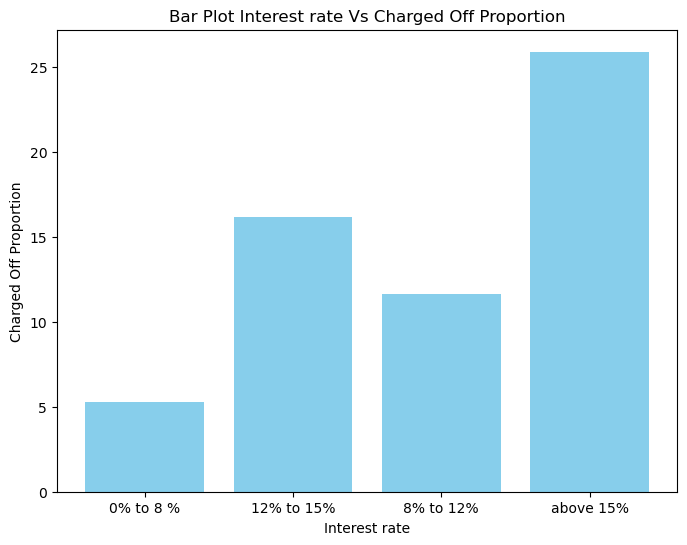

In [72]:
# the above table gives the inference that higher the interest rate  having the higher Defaulting rate
# Lets visualize it using bar plot.
plt.figure(figsize=(8, 6))
plt.bar(interest_df['interst_rate_b'], interest_df['Chargedoff_Proportion'], color='skyblue')

# Adding titles and labels
plt.title('Bar Plot Interest rate Vs Charged Off Proportion')
plt.xlabel('Interest rate')
plt.ylabel('Charged Off Proportion')
plt.show()

In [73]:
#Lets compare the Loan amount vs Charged off. Here instead of comparing loan amount directly with charged off, comparing the
#buckettized loan amount to get the better insights
loan_df = lending_df.groupby(['loan_amount_b', 'loan_status']).loan_status.count().unstack().reset_index()
loan_df['Total'] = loan_df['Charged Off'] + loan_df['Fully Paid']
loan_df['Chargedoff_Proportion'] = (loan_df['Charged Off'] / loan_df['Total']) * 100
loan_df.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,loan_amount_b,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
1,10-15k,848,263,5470,6318,13.421969
0,0-5k,1094,83,7084,8178,13.377354
2,5-10k,1326,138,9454,10780,12.300557


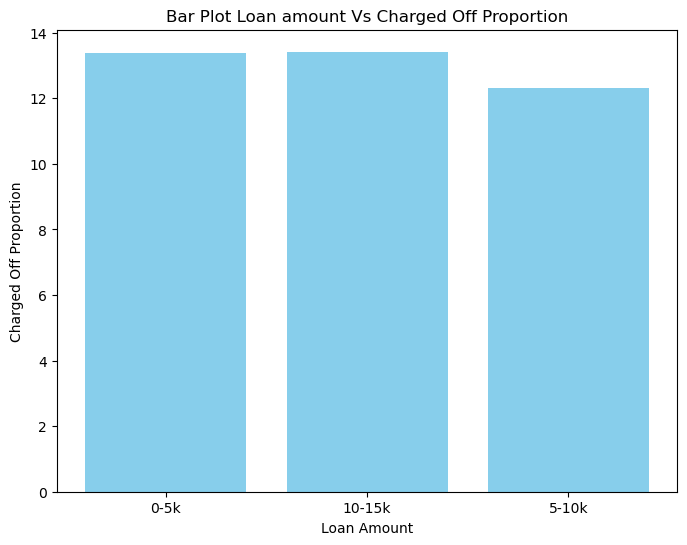

In [74]:
# Lets visualize it using bar plot.
plt.figure(figsize=(8, 6))
plt.bar(loan_df['loan_amount_b'], loan_df['Chargedoff_Proportion'], color='skyblue')

# Adding titles and labels
plt.title('Bar Plot Loan amount Vs Charged Off Proportion')
plt.xlabel('Loan Amount')
plt.ylabel('Charged Off Proportion')
plt.show()

In [75]:
# the above table does not give much inference that Amount of loan does not have much influence on Default or charged off.

In [76]:
#Lets compare the purpose vs Charged off. 
purpose_df = lending_df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().reset_index()
purpose_df['Total'] = purpose_df['Charged Off'] + purpose_df['Fully Paid']
purpose_df['Chargedoff_Proportion'] = ( purpose_df['Charged Off'] / purpose_df['Total'] ) * 100
purpose_df = purpose_df.drop('Current', axis=1)
purpose_df= purpose_df.sort_values(by='Chargedoff_Proportion', ascending=False)
purpose_df

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
10,small_business,311.0,898.0,1209.0,25.723739
9,renewable_energy,15.0,65.0,80.0,18.750000
7,moving,75.0,400.0,475.0,15.789474
8,other,478.0,2649.0,3127.0,15.286217
2,debt_consolidation,2088.0,12026.0,14114.0,14.793822
3,educational,38.0,219.0,257.0,14.785992
6,medical,81.0,473.0,554.0,14.620939
11,vacation,44.0,265.0,309.0,14.239482
4,house,261.0,1944.0,2205.0,11.836735
5,major_purchase,187.0,1584.0,1771.0,10.559006


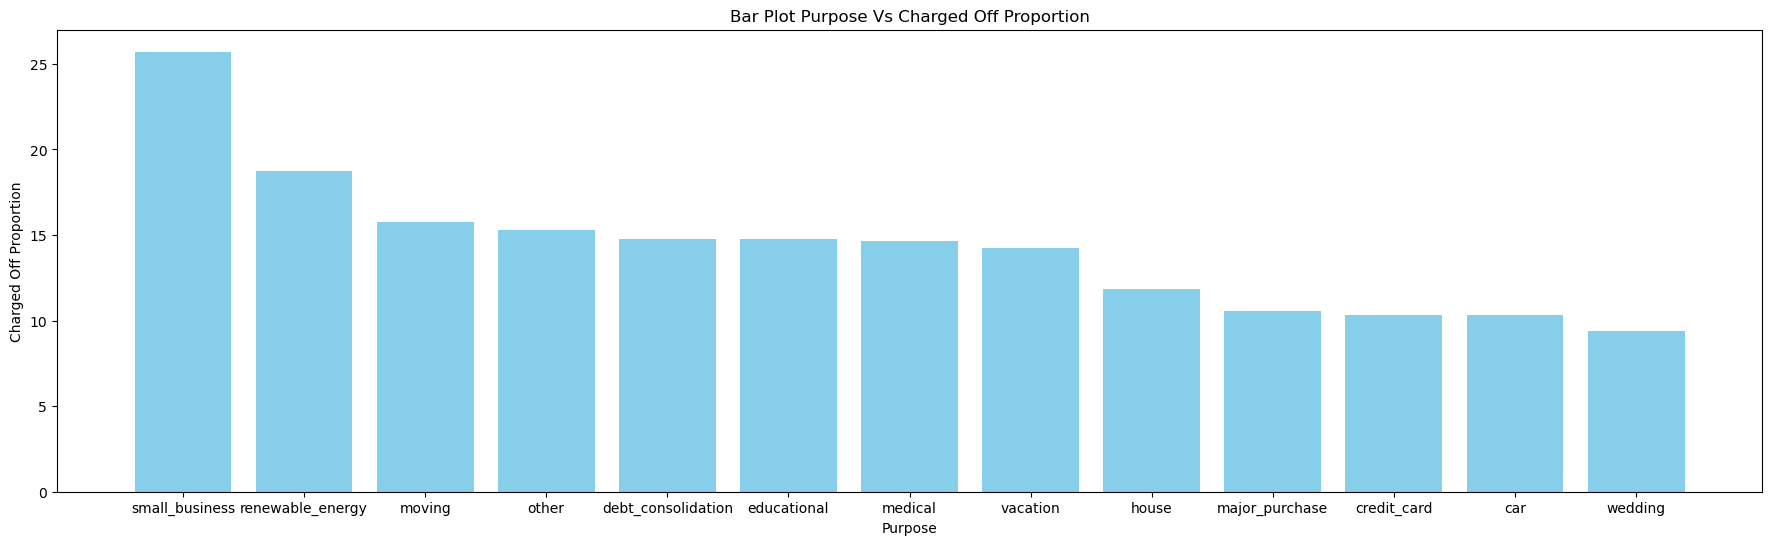

In [77]:
# Lets visualize it using bar plot.
plt.figure(figsize=(22, 6))
plt.bar(purpose_df['purpose'], purpose_df['Chargedoff_Proportion'], color='skyblue')

# Adding titles and labels
plt.title('Bar Plot Purpose Vs Charged Off Proportion')
plt.xlabel('Purpose')
plt.ylabel('Charged Off Proportion')
plt.show()

In [78]:
#Lets compare the House Ownership vs Charged off. 
house_df = lending_df.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().reset_index()
house_df['Total'] = house_df['Charged Off'] + house_df['Fully Paid']
house_df['Chargedoff_Proportion'] = (house_df['Charged Off'] / house_df['Total'] ) * 100
house_df = house_df.drop('Current', axis=1)
house_df= house_df.sort_values(by='Chargedoff_Proportion', ascending=False)
house_df

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,OTHER,12.0,65.0,77.0,15.584416
4,RENT,2293.0,13347.0,15640.0,14.661125
3,OWN,336.0,2023.0,2359.0,14.243323
0,MORTGAGE,1554.0,10504.0,12058.0,12.887709
1,NONE,NaN,3.0,NaN,NaN


In [79]:
# This above table is not giving much inference on home ownership influence on defaulting loan.

In [80]:
# Now lets analyze the loan issue year or month having any influence on the defaulting loan
lending_df['issue_year'] = lending_df['issue_d'].dt.year
lending_df['issue_month'] = lending_df['issue_d'].dt.month

In [81]:
#Lets compare the issued year vs Charged off. 
year_df = lending_df.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().reset_index()
year_df['Total'] =year_df['Charged Off'] + year_df['Fully Paid']
year_df['Chargedoff_Proportion'] = (year_df['Charged Off'] / year_df['Total']) *100
year_df = year_df.drop('Current', axis=1)
year_df= year_df.sort_values(by='Chargedoff_Proportion', ascending=False)
year_df

loan_status,issue_year,Charged Off,Fully Paid,Total,Chargedoff_Proportion
4,2011,2455.0,13510.0,15965.0,15.377388
0,2007,27.0,158.0,185.0,14.594595
1,2008,170.0,1029.0,1199.0,14.178482
3,2010,1121.0,8022.0,9143.0,12.260746
2,2009,422.0,3223.0,3645.0,11.577503


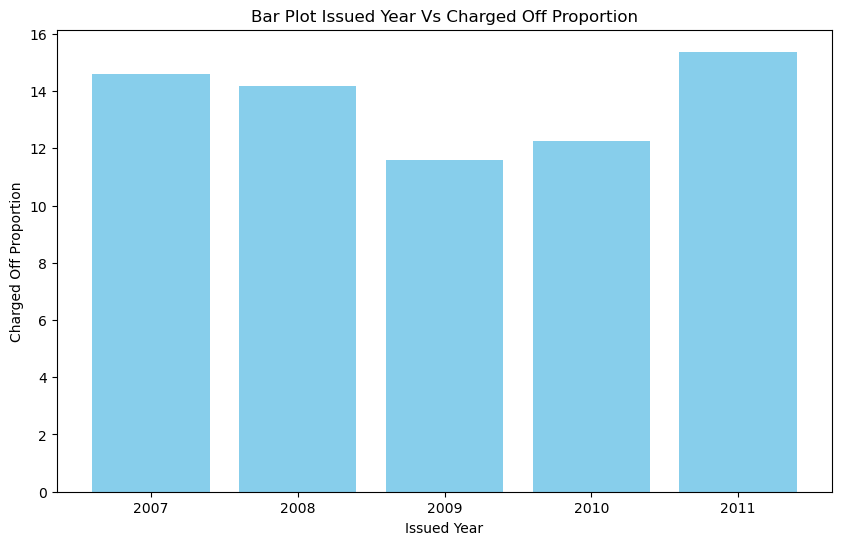

In [82]:
plt.figure(figsize=(10, 6))
plt.bar(year_df['issue_year'], year_df['Chargedoff_Proportion'], color='skyblue')

# Adding titles and labels
plt.title('Bar Plot Issued Year Vs Charged Off Proportion')
plt.xlabel('Issued Year')
plt.ylabel('Charged Off Proportion')
plt.show()

In [83]:
#Lets compare the issued year vs Charged off. 
month_df = lending_df.groupby(['issue_month', 'loan_status']).loan_status.count().unstack().reset_index()
month_df['Total'] =month_df['Charged Off'] + month_df['Fully Paid']
month_df['Chargedoff_Proportion'] = (month_df['Charged Off'] / month_df['Total']) * 100
month_df =month_df.drop('Current', axis=1)
month_df= month_df.sort_values(by='Chargedoff_Proportion', ascending=False)
month_df

loan_status,issue_month,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,12,523.0,2787.0,3310.0,15.800604
8,9,414.0,2238.0,2652.0,15.610860
4,5,352.0,1965.0,2317.0,15.192059
5,6,363.0,2150.0,2513.0,14.444887
9,10,405.0,2450.0,2855.0,14.185639
10,11,424.0,2700.0,3124.0,13.572343
6,7,363.0,2318.0,2681.0,13.539724
0,1,254.0,1638.0,1892.0,13.424947
7,8,346.0,2258.0,2604.0,13.287250
3,4,282.0,1957.0,2239.0,12.594908


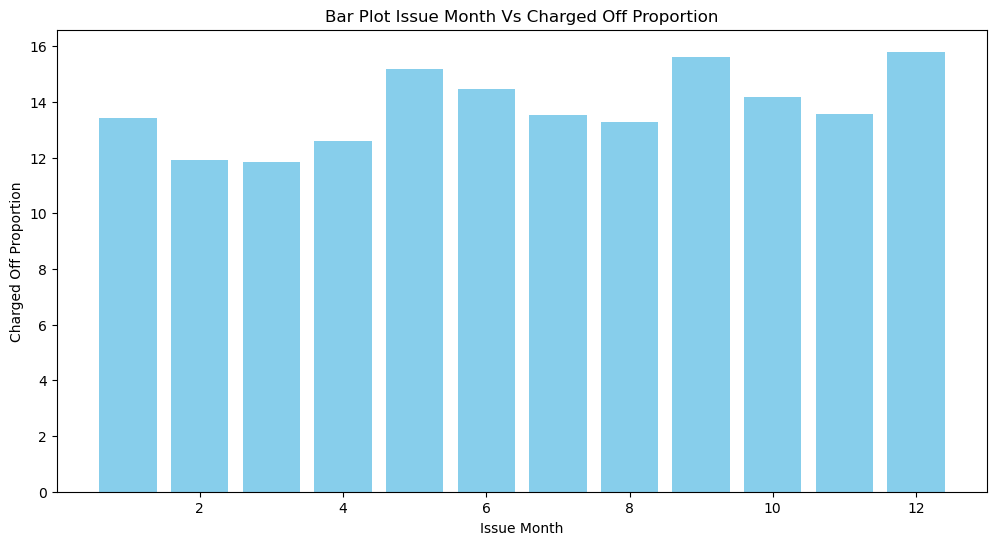

In [84]:
plt.figure(figsize=(12, 6))
plt.bar(month_df['issue_month'], month_df['Chargedoff_Proportion'], color='skyblue')

# Adding titles and labels
plt.title('Bar Plot Issue Month Vs Charged Off Proportion')
plt.xlabel('Issue Month')
plt.ylabel('Charged Off Proportion')
plt.show()

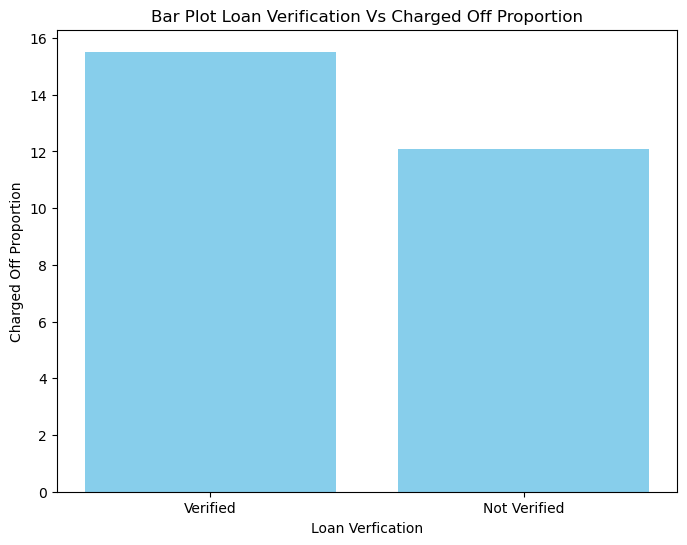

In [85]:
#Lets compare the Verification Status of loan vs Charged off. 
lending_df['verification_status'] = lending_df['verification_status'].replace('Source Verified', 'Verified')
verification_df = lending_df.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().reset_index()
verification_df['Total'] = verification_df['Charged Off'] + verification_df['Fully Paid']
verification_df['Chargedoff_Proportion'] = (verification_df['Charged Off'] / verification_df['Total']) * 100
verification_df = verification_df.drop('Current', axis=1)
verification_df = verification_df.sort_values(by='Chargedoff_Proportion', ascending=False)
verification_df
plt.figure(figsize=(8, 6))
plt.bar(verification_df['verification_status'], verification_df['Chargedoff_Proportion'], color='skyblue')

# Adding titles and labels
plt.title('Bar Plot Loan Verification Vs Charged Off Proportion')
plt.xlabel('Loan Verfication')
plt.ylabel('Charged Off Proportion')
plt.show()

loan_status grade  Charged Off  Fully Paid  Total  Chargedoff_Proportion
6               G           43          90    133              32.330827
5               F          184         395    579              31.778929
4               E          489        1289   1778              27.502812
3               D          814        2973   3787              21.494587
2               C         1043        5076   6119              17.045269
1               B         1122        8166   9288              12.080103
0               A          500        7953   8453               5.915060


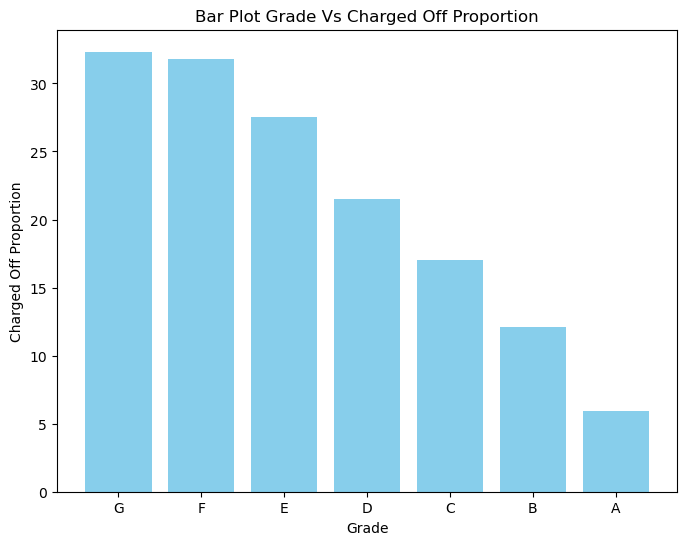

In [86]:
#Lets compare the grade vs Charged off. 
grade_df = lending_df.groupby(['grade', 'loan_status']).loan_status.count().unstack().reset_index()
grade_df['Total'] = grade_df['Charged Off'] + grade_df['Fully Paid']
grade_df['Chargedoff_Proportion'] = (grade_df['Charged Off'] / grade_df['Total']) * 100
grade_df = grade_df.drop('Current', axis=1)
grade_df = grade_df.sort_values(by='Chargedoff_Proportion', ascending=False)
print(grade_df)
plt.figure(figsize=(8, 6))
plt.bar(grade_df['grade'], grade_df['Chargedoff_Proportion'], color='skyblue')

# Adding titles and labels
plt.title('Bar Plot Grade Vs Charged Off Proportion')
plt.xlabel('Grade')
plt.ylabel('Charged Off Proportion')
plt.show()

loan_status addr_state  Charged Off  Fully Paid   Total  Chargedoff_Proportion
28                  NE          2.0         2.0     4.0              50.000000
13                  ID          1.0         3.0     4.0              25.000000
40                  SD         11.0        40.0    51.0              21.568627
0                   AK         12.0        46.0    58.0              20.689655
32                  NV         79.0       307.0   386.0              20.466321
31                  NM         26.0       115.0   141.0              18.439716
9                   FL        392.0      1844.0  2236.0              17.531306
11                  HI         24.0       114.0   138.0              17.391304
24                  MO         83.0       434.0   517.0              16.054159
10                  GA        166.0       899.0  1065.0              15.586854
20                  MD        122.0       663.0   785.0              15.541401
4                   CA        869.0      4727.0  559

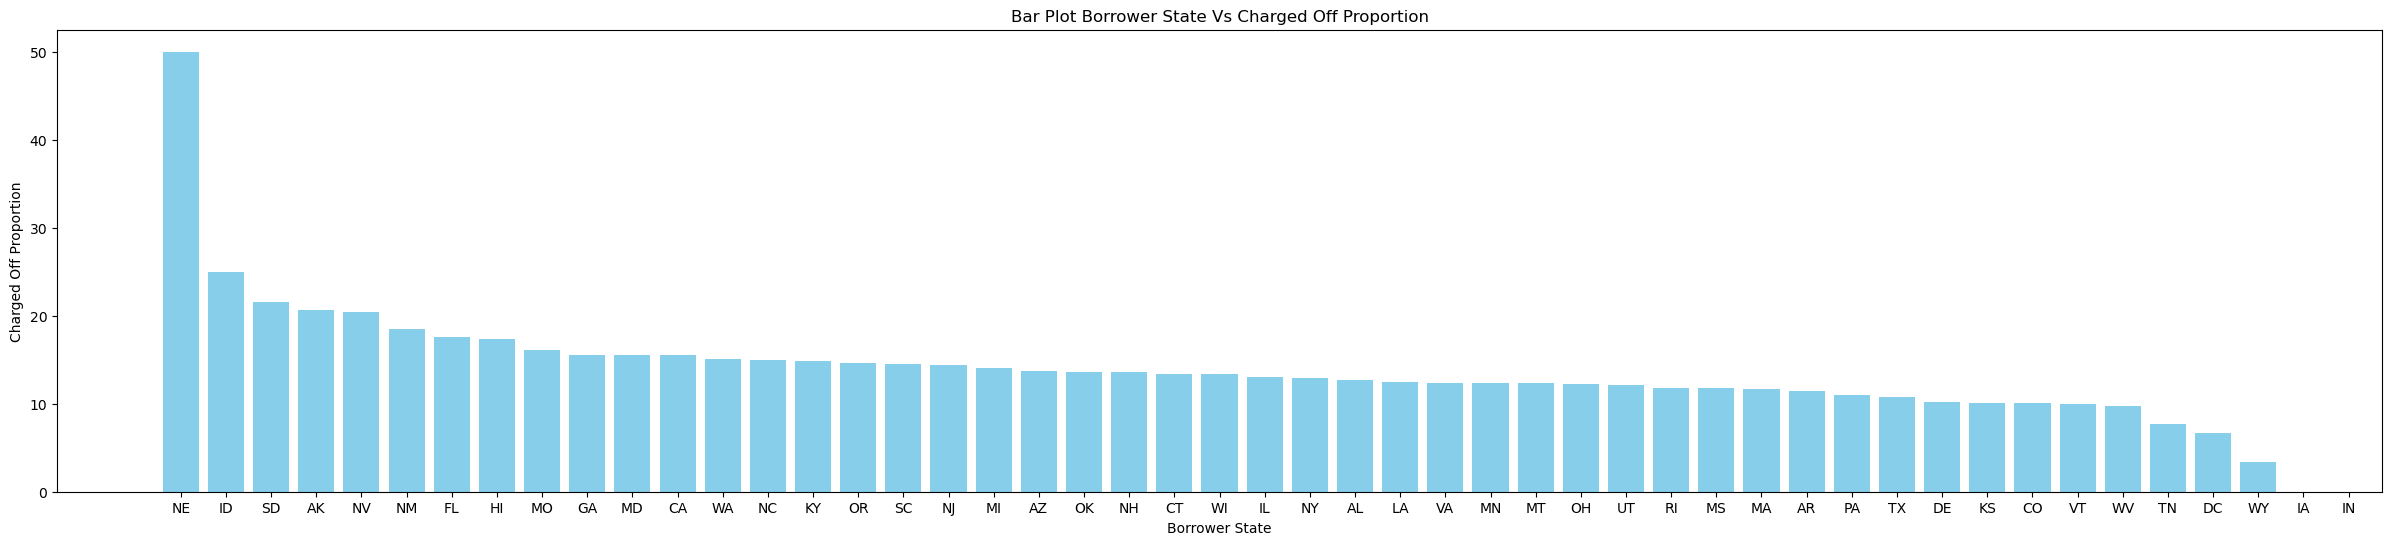

In [87]:
#Lets compare the Borrower State vs Charged off. 
address_df = lending_df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().reset_index()
address_df['Total'] = address_df['Charged Off'] + address_df['Fully Paid']
address_df['Chargedoff_Proportion'] = (address_df['Charged Off'] / address_df['Total']) * 100
address_df = address_df.drop('Current', axis=1)
address_df = address_df.sort_values(by='Chargedoff_Proportion', ascending=False)
print(address_df)
plt.figure(figsize=(30, 6))
plt.bar(address_df['addr_state'], address_df['Chargedoff_Proportion'], color='skyblue')

# Adding titles and labels
plt.title('Bar Plot Borrower State Vs Charged Off Proportion')
plt.xlabel('Borrower State')
plt.ylabel('Charged Off Proportion')
plt.show()

loan_status  pub_rec_bankruptcies  Charged Off  Fully Paid  Total  \
2                             2.0            2           3      5   
1                             1.0          275        1066   1341   
0                             0.0         3918       24873  28791   

loan_status  Chargedoff_Proportion  
2                        40.000000  
1                        20.507084  
0                        13.608419  


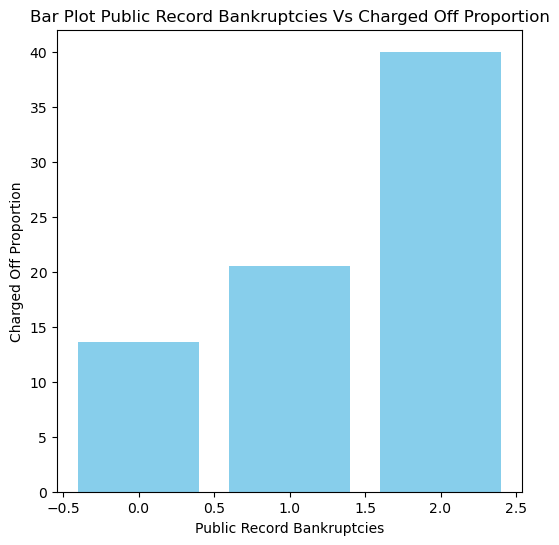

In [88]:
#Lets compare the Public Record Bankruptcies vs Charged off. 
bankruptcies_df = lending_df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().reset_index()
bankruptcies_df['Total'] = bankruptcies_df['Charged Off'] + bankruptcies_df['Fully Paid']
bankruptcies_df['Chargedoff_Proportion'] = (bankruptcies_df['Charged Off'] / bankruptcies_df['Total']) * 100
bankruptcies_df = bankruptcies_df.drop('Current', axis=1)
bankruptcies_df = bankruptcies_df.sort_values(by='Chargedoff_Proportion', ascending=False)
print(bankruptcies_df)
plt.figure(figsize=(6, 6))
plt.bar(bankruptcies_df['pub_rec_bankruptcies'], bankruptcies_df['Chargedoff_Proportion'], color='skyblue')

# Adding titles and labels
plt.title('Bar Plot Public Record Bankruptcies Vs Charged Off Proportion')
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Charged Off Proportion')
plt.show()

In [89]:
#Bucketting total monthly debt payments
def bucketize_monthy_debt_payment(value):
    if value <= 5 :
        return '0 to 5%'
    elif (value > 5 ) and (value <= 10 ):
        return '5 to 10%'
    elif (value > 10 ) and (value <= 15):
        return '10 to 15%'
    elif (value > 15 ) and (value <= 20):
        return '15 to 20%'
    elif (value > 20) and ( value <= 25):
        return '20 to 25%'
    elif (value > 25 ) and (value <= 30):
        return '25 to 30%'
    elif value > 30 :
        return 'above 30%'
lending_df['dti_b'] = lending_df.apply(lambda x : bucketize_monthy_debt_payment(x['dti']), axis =1 )

loan_status      dti_b  Charged Off  Fully Paid  Total  Chargedoff_Proportion
3            20 to 25%          858        4280   5138              16.699105
2            15 to 20%         1028        5843   6871              14.961432
1            10 to 15%         1046        6482   7528              13.894793
4            25 to 30%           64         414    478              13.389121
5             5 to 10%          744        5423   6167              12.064213
0              0 to 5%          455        3500   3955              11.504425


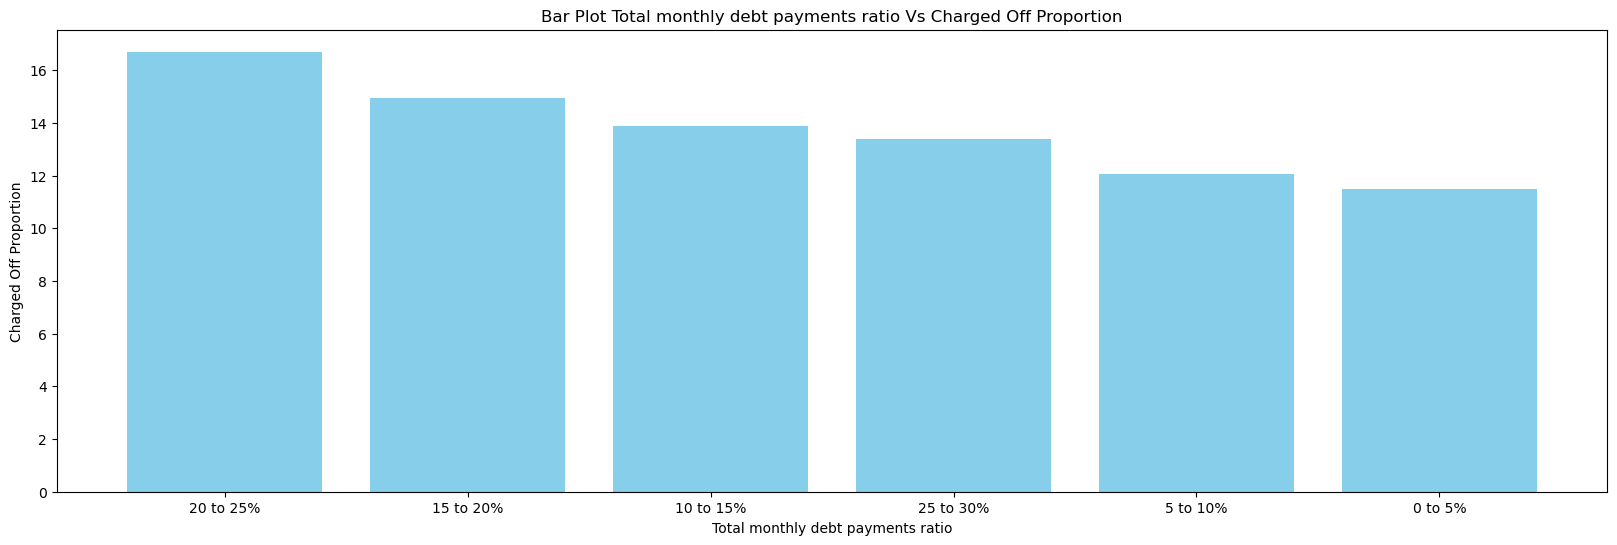

In [90]:
#Lets compare the total monthly debt payments ratio vs Charged off. 
dti_df = lending_df.groupby(['dti_b', 'loan_status']).loan_status.count().unstack().reset_index()
dti_df['Total'] =dti_df['Charged Off'] + dti_df['Fully Paid']
dti_df['Chargedoff_Proportion'] = (dti_df['Charged Off'] / dti_df['Total']) * 100
dti_df = dti_df.drop('Current', axis=1)
dti_df =dti_df.sort_values(by='Chargedoff_Proportion', ascending=False)
print(dti_df)
plt.figure(figsize=(20, 6))
plt.bar(dti_df['dti_b'], dti_df['Chargedoff_Proportion'], color='skyblue')

# Adding titles and labels
plt.title('Bar Plot Total monthly debt payments ratio Vs Charged Off Proportion')
plt.xlabel('Total monthly debt payments ratio')
plt.ylabel('Charged Off Proportion')
plt.show()

In [91]:
#multivariate analysis
#Heatmap
lending_corr = lending_df
# Convert  columns to categorical type
lending_corr['purpose'] = pd.Categorical(lending_corr['purpose'])
lending_corr['grade'] = pd.Categorical(lending_corr['grade'])
lending_corr['home_ownership'] = pd.Categorical(lending_corr['home_ownership'])
lending_corr['loan_status'] = pd.Categorical(lending_corr['loan_status'])
lending_corr['addr_state'] = pd.Categorical(lending_corr['addr_state'])

# Assign numerical codes to each category
lending_corr['purpose_code'] = lending_corr['purpose'].cat.codes
lending_corr['grade_code'] = lending_corr['grade'].cat.codes
lending_corr['home_ownership_code'] = lending_corr['home_ownership'].cat.codes
lending_corr['loan_status_code'] = lending_corr['loan_status'].cat.codes
lending_corr['addr_state_code'] = lending_corr['addr_state'].cat.codes
lending_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30947 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                30947 non-null  float64       
 1   funded_amnt              30947 non-null  float64       
 2   funded_amnt_inv          30947 non-null  float64       
 3   term                     30947 non-null  int32         
 4   int_rate                 30947 non-null  float64       
 5   installment              30947 non-null  float64       
 6   grade                    30947 non-null  category      
 7   emp_length               30947 non-null  float64       
 8   home_ownership           30947 non-null  category      
 9   annual_inc               30947 non-null  float64       
 10  verification_status      30947 non-null  object        
 11  issue_d                  30947 non-null  datetime64[ns]
 12  loan_status              30947 non-nu

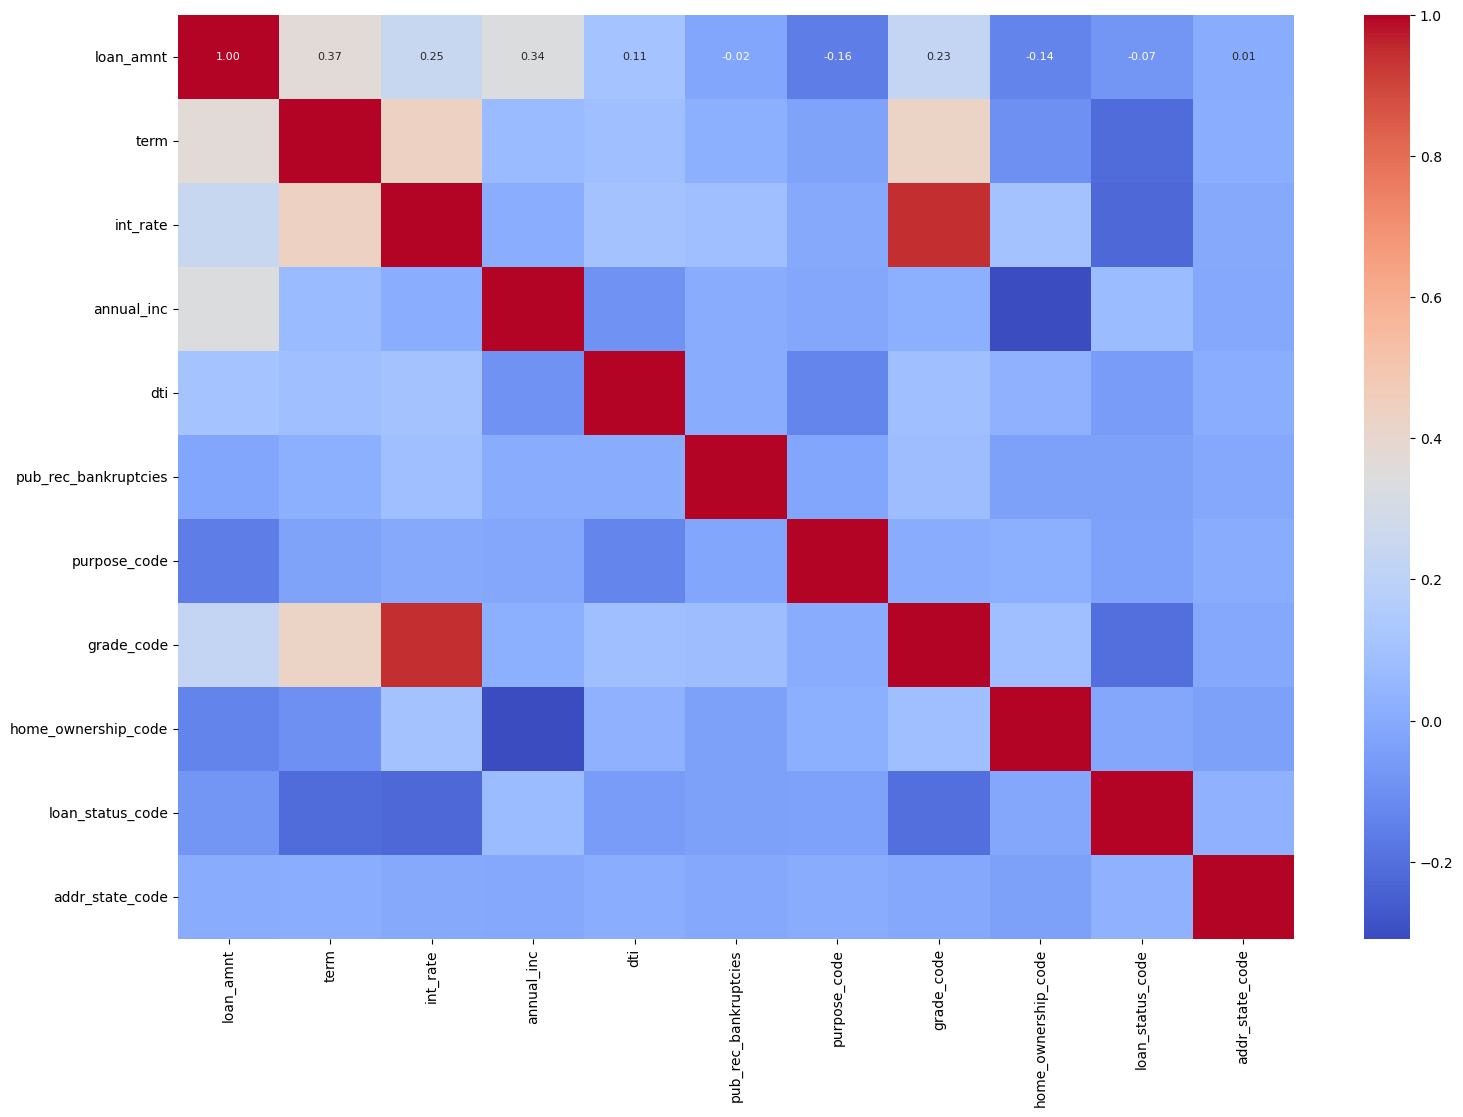

In [92]:
plt.figure(figsize = (18,12))
sns.heatmap(lending_corr[["loan_amnt","term","int_rate","annual_inc","dti","pub_rec_bankruptcies","purpose_code","grade_code","home_ownership_code","loan_status_code","addr_state_code" ]].corr(),cmap='coolwarm', fmt=".2f",annot=True,annot_kws={"size": 8})
plt.show()

In [93]:
## final Conclusion

In [94]:
#1. Lower the income group having higher percentage of charged off.
#2. Interest rate above 12% is having higher percentage of Charged off
#3. Small business and renewable energy loans having higher percentage of charged off.
#4. The loan distributed in 2011 and Dec month having higher percentage of charged off.
#5. G and F grade customers having higher percentage of charged off.
#6. Cutomers who are having higher number of public record bankruptcies having higher percentage of charged off.
#7. Customers having above 15% total montly monthly debts payment having higher percentage of charged off.
